In [0]:
from google.colab import drive
drive.mount('/content/drive/')
folder_path = 'drive/My Drive/TFG/NN/Multispectral'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2


cat: /usr/local/cuda/include/cudnn.h: No such file or directory


In [0]:
!pip install -q keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
# not part of working module
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from PIL import Image
# load an image from file
image = load_img('/detection/My Drive/detection/input/after damage 1.jpg', target_size=(1024, 1024))
img = np.asarray(Image.open('/detection/My Drive/detection/input/after damage 1.jpg'))
print(img.shape)
plt.imshow(image)
plt.show()




FileNotFoundError: ignored

In [0]:
# not part of working module
import tensorflow as tf

image=img_to_array(image)
image2 = load_img('/detection/My Drive/detection/post_001_073.png', target_size=(1024, 1024))

image2=img_to_array(image2)
#print(image)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
datadir= folder_path
categories=["damaged", "undamaged"]
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    #plt.imshow(img_array)
    #plt.show()
    break
  break


In [0]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join(datadir,category)
    class_num=categories.index(category) # index as 0 and 1 to damaged and undamaged
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array= cv2.resize(img_array,(128,128))
      training_data.append([img_array,class_num])
      
create_training_data()

In [0]:
print(len(training_data))
import random
random.shuffle(training_data)

268


In [0]:

for sample in training_data:
  print(sample[1])
  
print(len(sample))

0
0
1
0
0
0
1
1
0
1
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
1
0
1
1
0
0
1
1
1
0
0
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
0
0
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
0
1
1
0
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
0
1
1
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
0
0
1
0
0
0
0
1
1
0
1
1
0
1
1
1
1
0
2


In [0]:
x=[]
y=[]
for features, label in training_data:
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,128,128,1)
print(len(x))
print(len(y))

268
268


In [0]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [0]:
# x[1] is feature and y[1] is label

1

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle
from keras.preprocessing.image import load_img
import time
import datetime
from tensorflow.keras.callbacks import TensorBoard
#image = load_img('/detection/My Drive/detection/test1.png')

x=pickle.load(open("x.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))
x=x/255.0

start = time.time()

time_saver = datetime.datetime.now().strftime("%d%m%Y-%H%M%S")
name_file= "Original_128CNN_"+time_saver
filepath = folder_path+'/models/Original_128_CNN-'+time_saver+'.h5'
tensorboard = TensorBoard(log_dir=folder_path+'/logs/{}'.format(name_file), write_graph=True, write_images=True,
                          histogram_freq=1,profile_batch=3)




model = Sequential()


model.add( Conv2D(64,(3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))



model.add( Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))  
model.add(Dropout(0.5))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))  
model.add(Dropout(0.5))

# added one more layer 
model.add( Conv2D(64,(3,3)))
model.add(Activation("relu"))
 




model.add(Flatten())
model.add(Dense(64))
    


model.add(Dense(1))  
          
model.add(Activation("sigmoid"))
#model.add(Activation("softmax"))


model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=['accuracy'])
model.summary()
print (len(x))
print (len(y))
history=model.fit(x,y, batch_size=32, epochs=200, validation_split=0.2,callbacks=[tensorboard])  
end = time.time()    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
activation_1 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


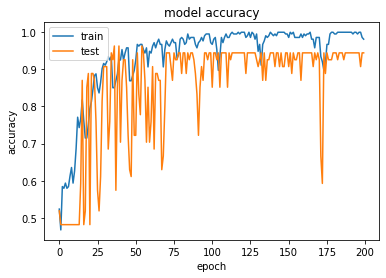

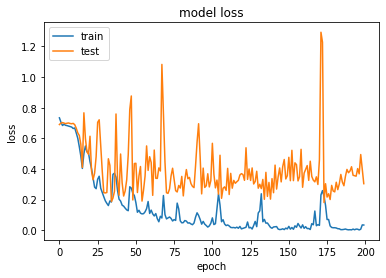

In [0]:
# list all data in history to plot accuracy
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
#print(model.predict(image))
model.save(folder_path+'/models/model/Original_128CNN.h5')
model.save_weights(folder_path+'/models/weights/Original_128CNN.h5')




def prepare(filename):
  img_array=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(img_array,(128,128))
  return new_array.reshape(-1,128,128,1)
model=tf.keras.models.load_model(folder_path+'/models/model/Original_128CNN.h5')
model.load_weights(folder_path+'/models/weights/Original_128CNN.h5')
prediction=model.predict([prepare(folder_path+'/undamaged/post_004_084.png')])
#print (categories[int(prediction[0][0])])
print (categories[int(prediction[0])])
print(prediction)
print(end-start)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
damaged
[[0.]]
827.0847568511963


In [0]:
#categories=["damaged","undamaged"] Testing code
def prepare(filename):
  img_array=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(img_array,(128,128))
  return new_array.reshape(-1,128,128,1)
model=tf.keras.models.load_model('128CNN.h5')
model.load_weights('128CNN_weights.h5')

prediction=model.predict([prepare('/detection/My Drive/detection/post_061_057.png')])
#print (categories[int(prediction[0][0])])
print(prediction)

[[0.]]


In [0]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model=tf.keras.models.load_model(folder_path+'/models/128CNN.h5')
model.load_weights(folder_path+'/models/128CNN_weights.h5')
model.save(folder_path+'/models/tf/',save_format='tf')

INFO:tensorflow:Assets written to: drive/My Drive/TFG/NN/Multispectral/models/tf/assets
